<a href="https://colab.research.google.com/github/20184415/qwer/blob/main/K_%ED%8F%89%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-평균

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path, img_size=(100, 100)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('jpg'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                resized_img = cv2.resize(img, img_size)
                images.append(resized_img)
    return np.array(images)


def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray')
            axs[i, j].axis('off')
    plt.show()


# 이미지가 들어있는 디렉토리 경로
folder_path = r"/content/drive/MyDrive/Colab Notebooks/qweqwe"

# 디렉토리 내의 모든 이미지 파일을 읽어옴
images = load_images_from_folder(folder_path)
np.random.shuffle(images)

## KMeans 클래스

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 4 1 4 1 4 3 3 3 0 1 4 3 2 1 1 4 4 4 0 4 4 2 2 0 3 3 1 2 3 0 4 1 4 4 3 0
 4 2 3 4 4 2 1 2 0 2 4 0 3 2 2 1 2 3 1 0 1 1 0 0 3 3 2 0 2 2 4 4 4 4 4 3 1
 4 4 2 2 2 3 3 3 3 1 4 3 4 2 3 3 1 4 3 2 3 4 3 1 3 1 3 0 1 1 3 2 2 3 3 4 0
 2 4 3 1 3 4 4 4 2 3 4 1 3 1 4 4 3 4 1 0 4 0 3 4 2 1 4 1 3 1 4 3 1 0 3 1 2
 2 4 4 4 2 1 2 4 3 4 1 3 0 1 3 4 3 1 2 4 3 4 3 1 4 4 4 0 2 4 2 0 4 3 2 2 3
 4 0 4 4 4 0 2 0 2 2 1 2 1 3 3 4 4 4 3 4 4 3 1 3 3 4 1 3 0 4 3 2 4 4 4 3 4
 4 2 4 2 2 4 3 4 1 2 0 4 0 3 2 3 0 4 4 2 2 4 2 4 4 3 4 3 2 4 3 2 1 1 1 0 4
 3 4 4 4 3 2 4 3 4 4 4 1 3 4 0 1 2 2 1 2 1 0 3 4 2 4 1 2 0 4 2 3 3 1 3 4 4
 0 4 0 2 4 4 3 3 1 4 4 2 3 4 1 2 2 3 3 3 1 4 0 3 0 3 1 4 2 2 4 4 4 4 3 4 4
 3 3 2 3 1 4 2 4 3 3 3 1 2 3 4 3 2 3 1 4 1 0 1 3 4 4 3 4 4 2 4 2 0 2 4 3 4
 2 2 0 1 3 2 3 3 1 3 1 1 4 0 1 3 4 1 3 3 3 2 4 3 1 1 2 2 4 2 1 3 4 4 1 3 3
 4 0 4 3 2 1 2 3 1 3 4 1 1 3 1 4 1 1 2 4 3 1 2 4 0 3 4 1 4 1 3 3 4 3 3 2 1
 3 4 0 1 0 4 2 3 2 3 2 1 0 1 3 1 3 4 4 3 4 3 4 3 3 4 4 3 3 0 2 4 3 3 0 2 3
 3 3 3 0 1 3 2 0 1 4 1 3 

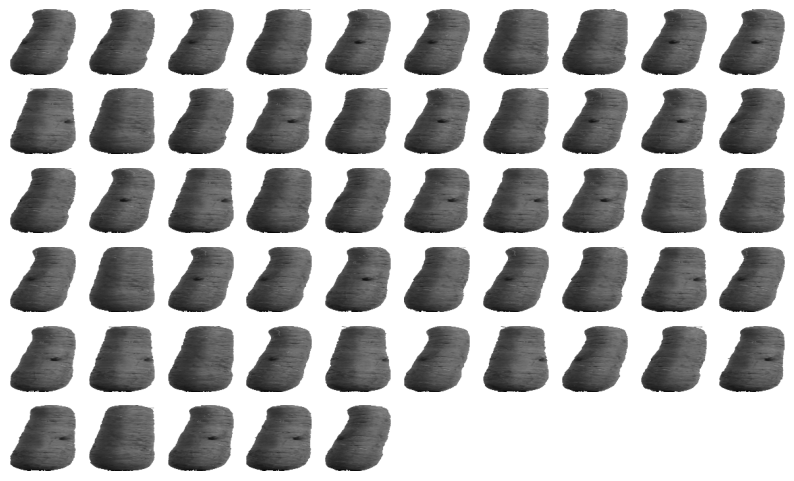

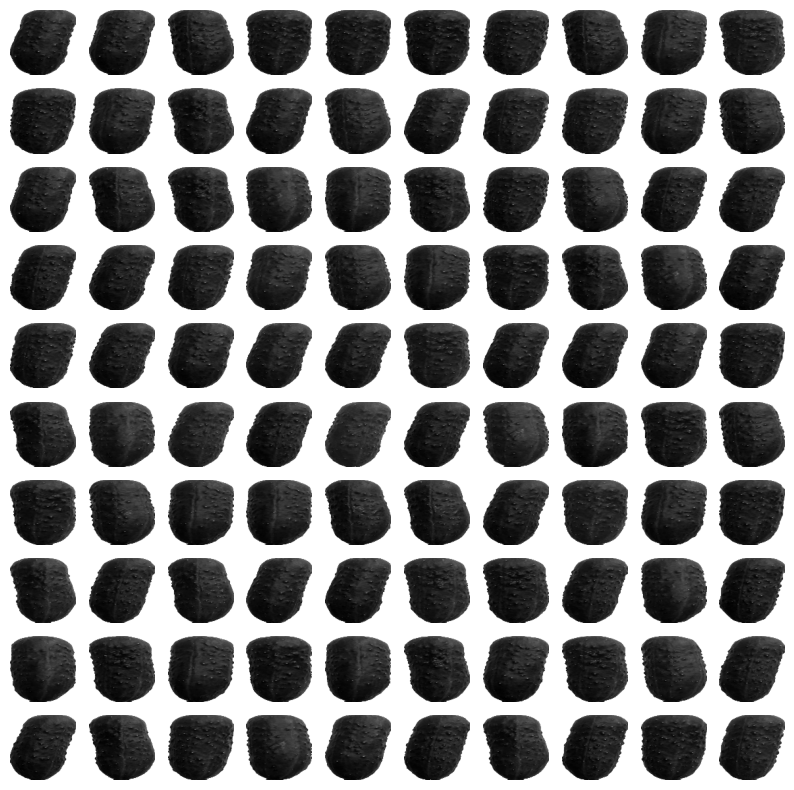

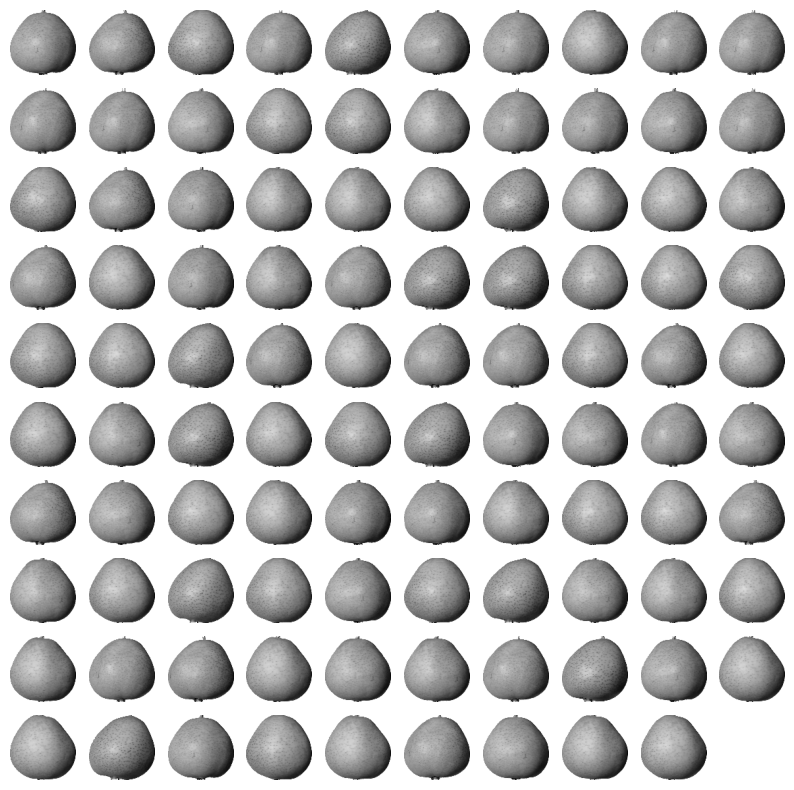

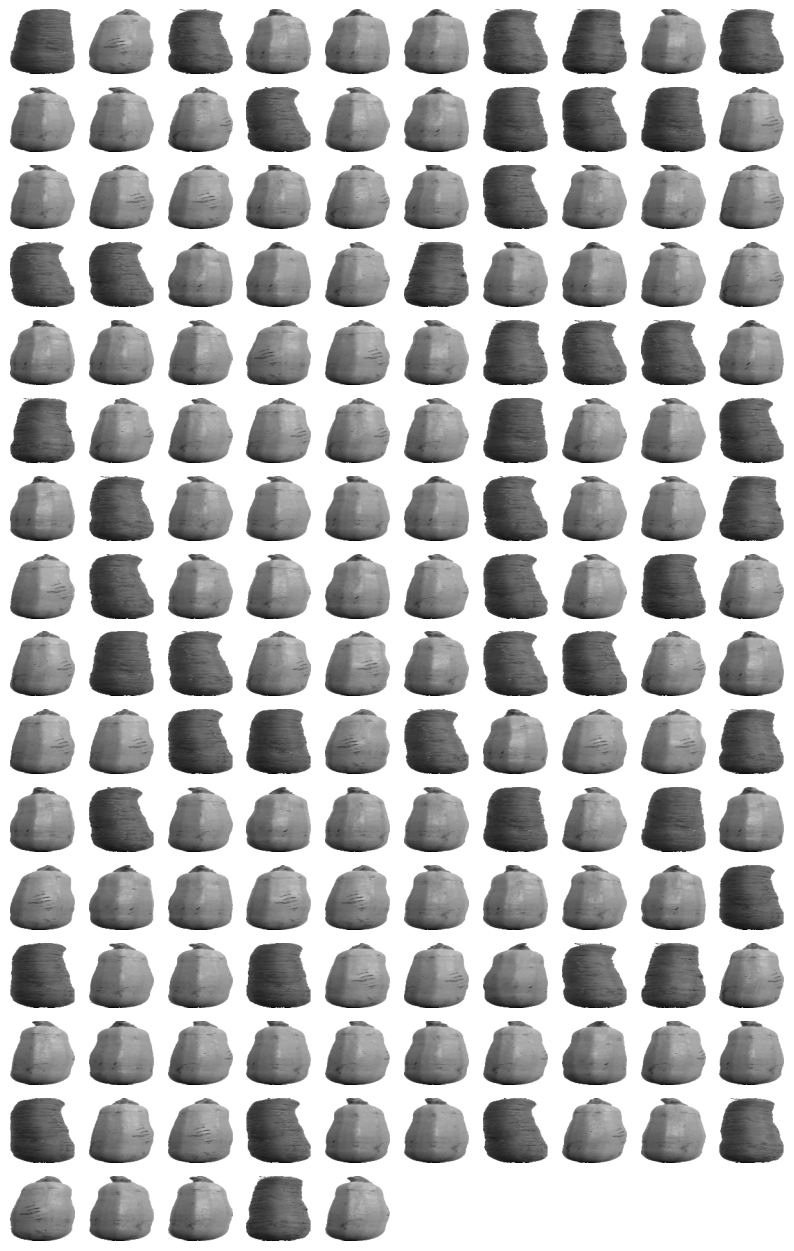

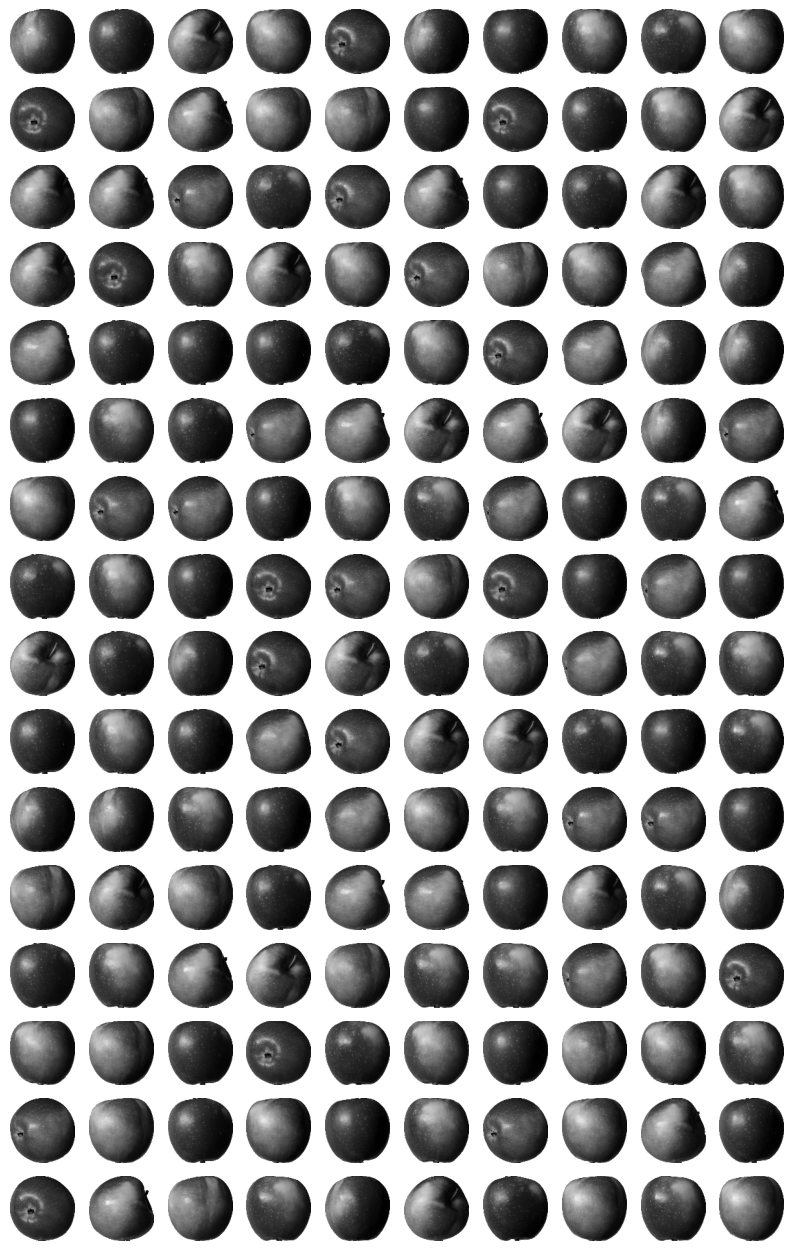

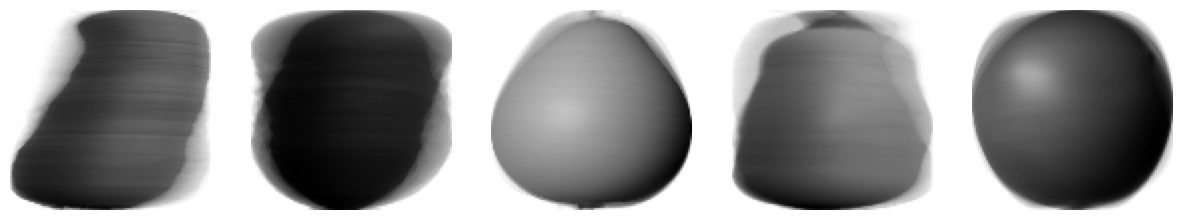

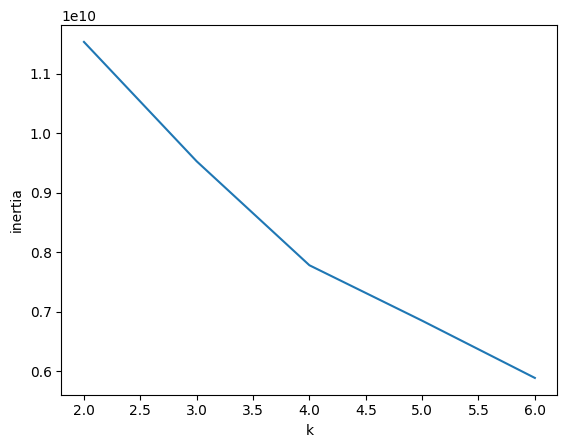

In [17]:

fruits_2d = images.reshape(-1, 100*100)
km = KMeans(n_clusters=5, random_state=42)
km.fit(fruits_2d)

print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

# 각 클러스터의 이미지를 시각화 (0, 1, 2로 변경)
for i in range(5):
    draw_fruits(images[km.labels_ == i])

# 클러스터 중심을 시각화
cluster_centers = km.cluster_centers_.reshape(-1, 100, 100).astype(np.uint8)
draw_fruits(cluster_centers, ratio=3)

# 클러스터 수에 따른 inertia 값을 구하고 시각화
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
